# Unit 7.5: Improving Predictions with Data Augmentation

## Part 1 of 3: Looking and Image Augmentations Using TorchVision

- Loading a model from the PyTorch Hub: https://pytorch.org/docs/stable/hub.html

In [10]:
import lightning as L
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchmetrics
from lightning.pytorch.loggers import CSVLogger
import matplotlib.pyplot as plt
import numpy as np

from shared_utilities import LightningModel,Cifar10DataModule, plot_loss_and_acc

In [11]:
entrypoints = torch.hub.list('pytorch/vision', force_reload=True)
for e in entrypoints:
    if "resnet" in e:
        print(e)

Downloading: "https://github.com/pytorch/vision/zipball/main" to /Users/alimtleuliyev/.cache/torch/hub/main.zip


deeplabv3_resnet101
deeplabv3_resnet50
fcn_resnet101
fcn_resnet50
resnet101
resnet152
resnet18
resnet34
resnet50
wide_resnet101_2
wide_resnet50_2


In [12]:
pytorch_model = torch.hub.load('pytorch/vision', 'resnet18', weights=None)

Using cache found in /Users/alimtleuliyev/.cache/torch/hub/pytorch_vision_main


In [13]:
L.pytorch.seed_everything(123)

dm = Cifar10DataModule(batch_size=64)
dm.prepare_data()
dm.setup()

Global seed set to 123


Files already downloaded and verified


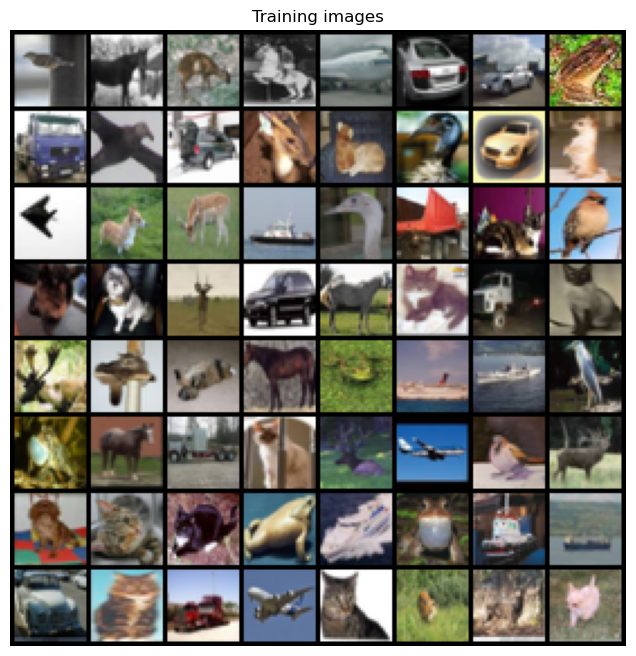

In [14]:
for images, labels in dm.train_dataloader():  
    break

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training images")
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images[:64], 
    padding=2,
    normalize=True),
    (1, 2, 0)))
plt.show()

## Custom Data Transform

In [15]:
from torchvision import transforms

train_transform = transforms.Compose(
    [   
        transforms.ToPILImage(),
        transforms.Resize((150, 150)),
        transforms.RandomCrop((128, 128)),
        transforms.RandomHorizontalFlip(p=0.2),
        transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # [0, 1] -> [-1, 1]
    ]
)

test_transform = transforms.Compose(
    [   
        transforms.ToPILImage(),
        transforms.Resize((150, 150)),
        transforms.CenterCrop((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

In [16]:
dm = Cifar10DataModule(batch_size=64, num_workers=8)


L.seed_everything(123)
dm.prepare_data()
dm.setup()

for images, labels in dm.train_dataloader():  
    break

Global seed set to 123


Files already downloaded and verified


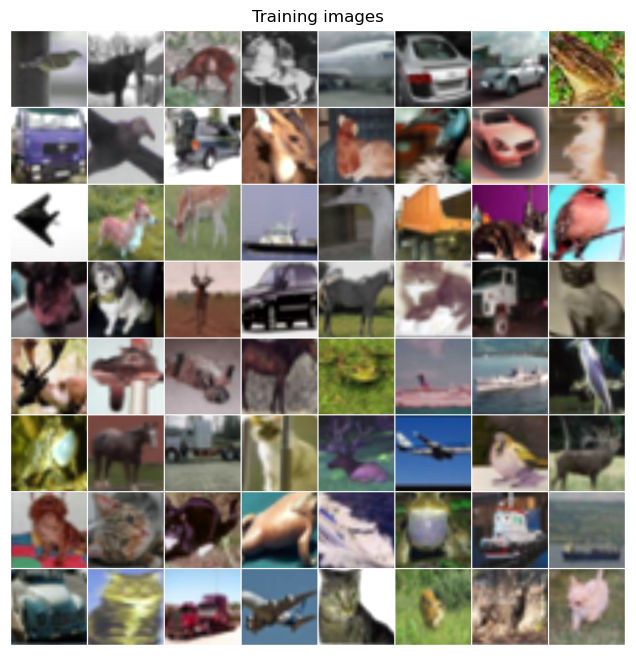

In [17]:
transformed = [train_transform(i) for i in images]

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training images")
plt.imshow(np.transpose(torchvision.utils.make_grid(
    transformed[:64], 
    padding=2,
    pad_value=1.0,
    normalize=True),
    (1, 2, 0)))
plt.show()

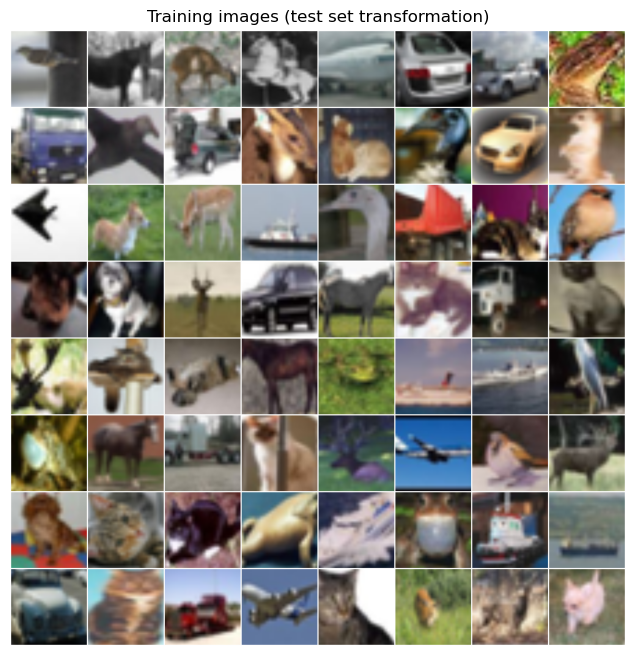

In [18]:
transformed = [test_transform(i) for i in images]

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training images (test set transformation)")
plt.imshow(np.transpose(torchvision.utils.make_grid(
    transformed[:64], 
    padding=2,
    pad_value=1.0,
    normalize=True),
    (1, 2, 0)))
plt.show()